In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
data=pd.read_csv('forestfires.csv')
data

In [81]:
data.shape

(517, 31)

In [82]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [83]:
label_encoder = LabelEncoder()

In [84]:
data['month'] = label_encoder.fit_transform(data['month'])


In [85]:
data.month.value_counts()

1     184
11    172
7      54
5      32
3      20
6      17
10     15
0       9
2       9
4       2
8       2
9       1
Name: month, dtype: int64

In [86]:
data['day'] = label_encoder.fit_transform(data['day'])

In [87]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [88]:
data=pd.get_dummies(data,columns=['size_category'])
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category_large,size_category_small
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,1,0,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,1,0,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,1,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,1,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,1,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [89]:
data=data.drop(columns=['size_category_large'])
data=data.drop(columns=['month'])
data=data.drop(columns=['day'])
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category_small
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [90]:
X = data.iloc[:,0:-1]
Y = data.iloc[:,-1]
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
data.shape

(517, 29)

In [92]:
data.corr()["size_category_small"].sort_values(ascending=False)

size_category_small    1.000000
monthaug               0.058954
daythu                 0.045985
RH                     0.045243
monthjun               0.038423
monthjan               0.037790
monthmar               0.035923
monthnov               0.026695
dayfri                 0.021810
daywed                 0.021659
monthapr               0.014001
daymon                 0.011156
ISI                    0.008726
monthoct               0.000855
temp                  -0.006021
monthjul              -0.007179
monthfeb              -0.014090
daysun                -0.016429
DC                    -0.019428
FFMC                  -0.022063
monthmay              -0.032488
DMC                   -0.034715
daytue                -0.036998
daysat                -0.040397
monthsep              -0.044038
rain                  -0.050001
wind                  -0.059113
monthdec              -0.186140
area                  -0.311322
Name: size_category_small, dtype: float64

In [93]:
numerical_features = data.describe(include=["int64","float64"]).columns
numerical_features

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep'],
      dtype='object')

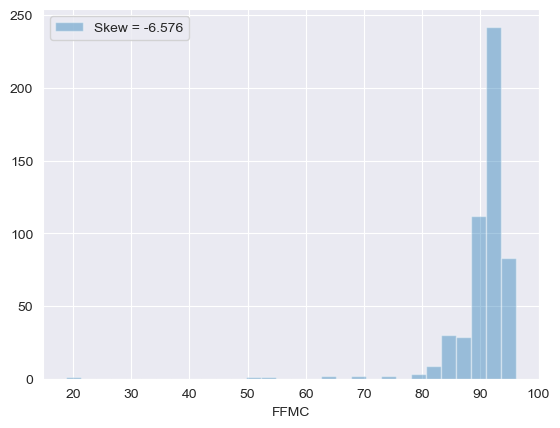

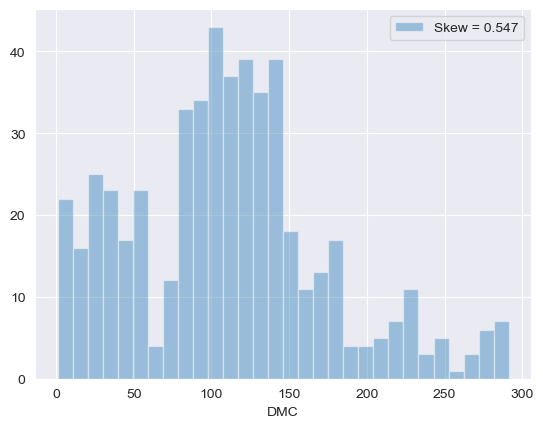

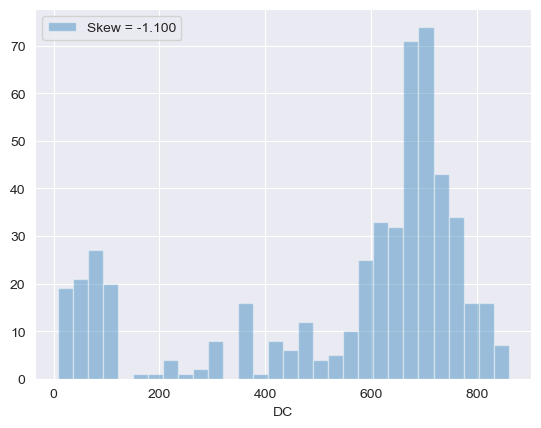

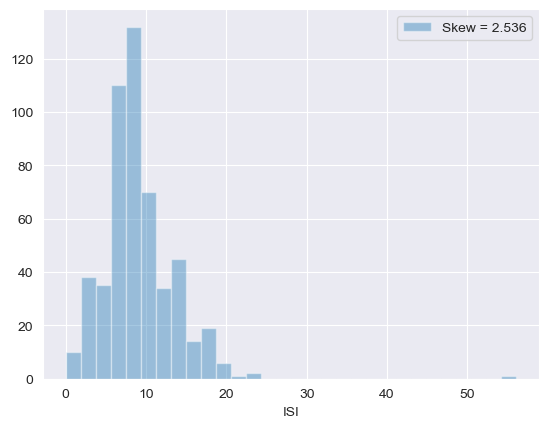

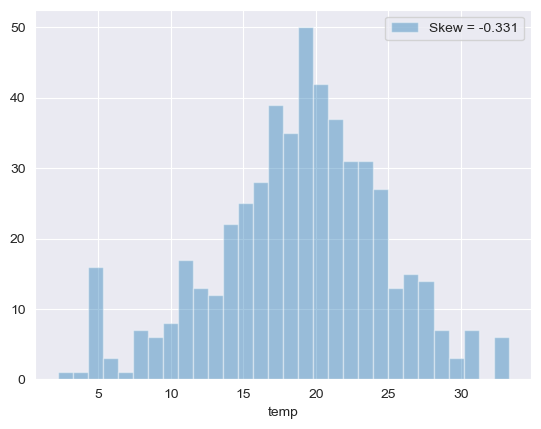

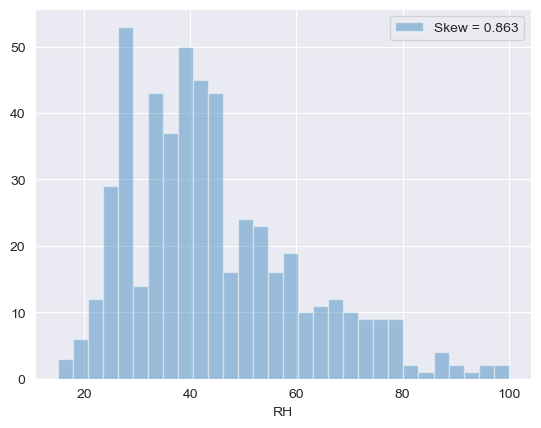

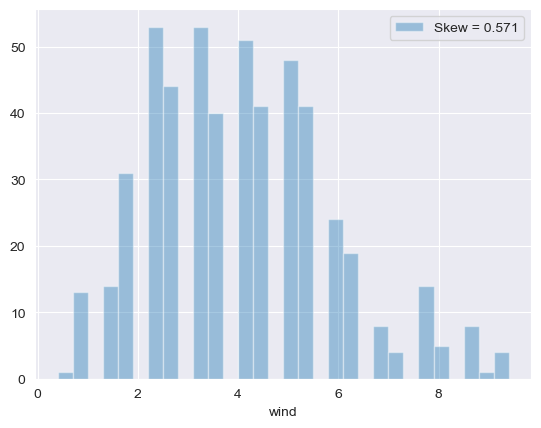

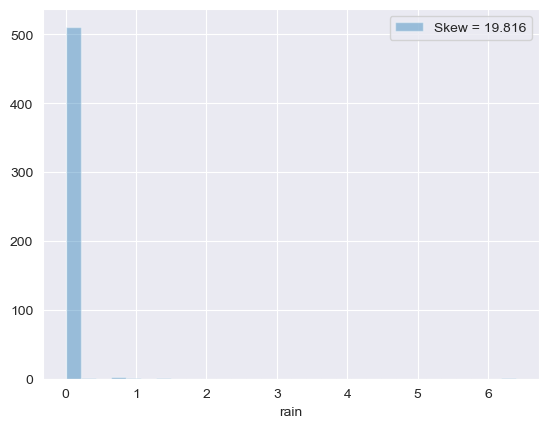

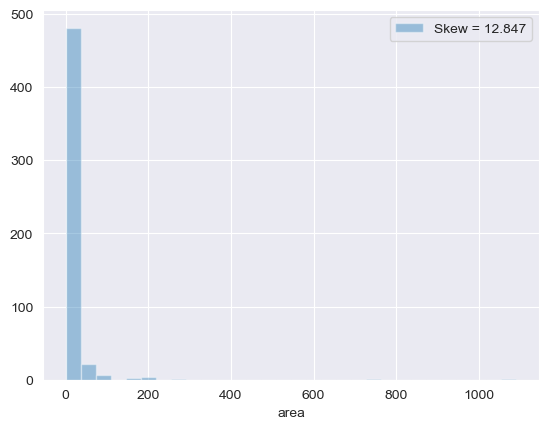

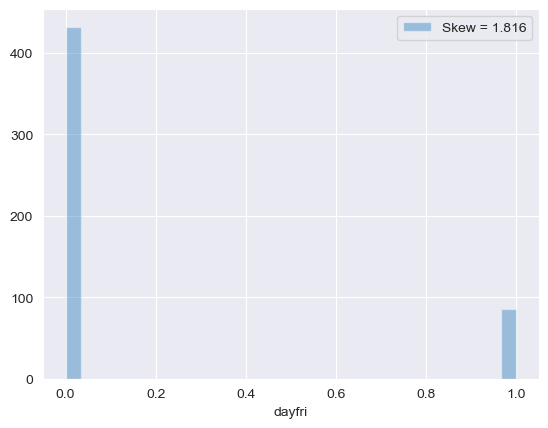

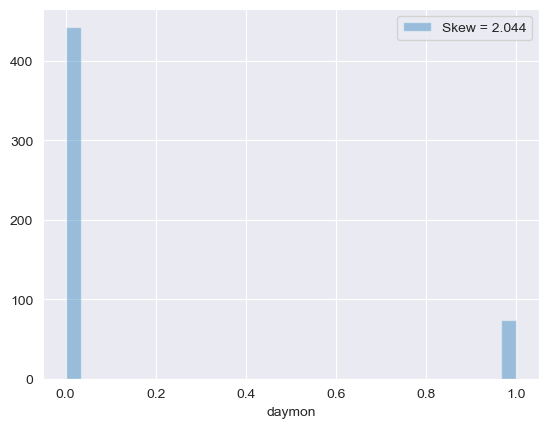

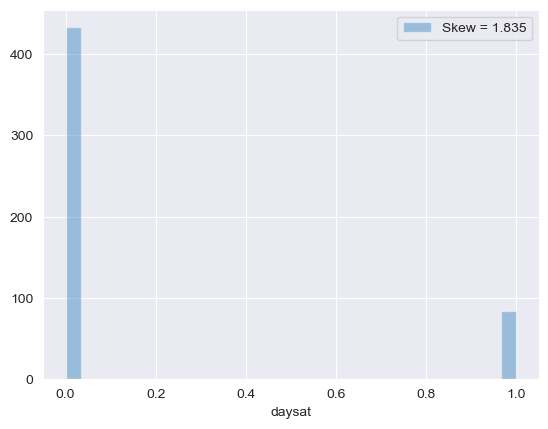

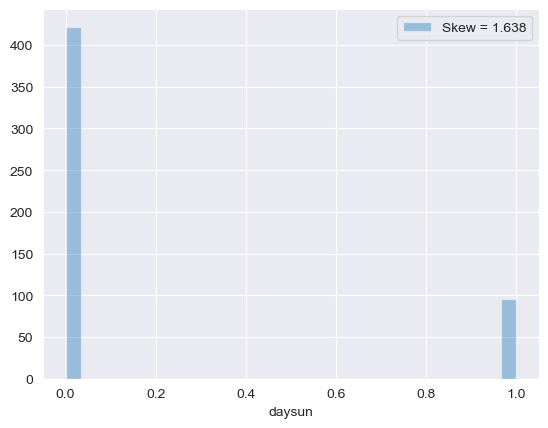

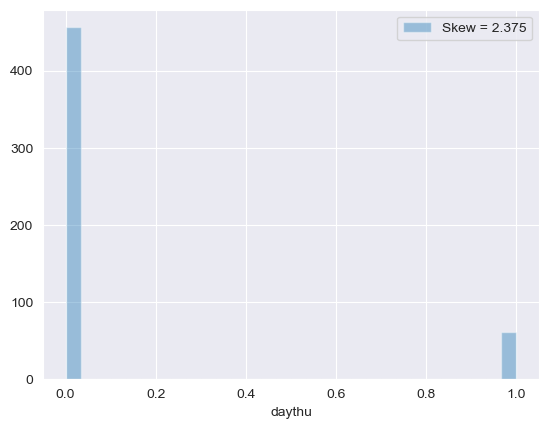

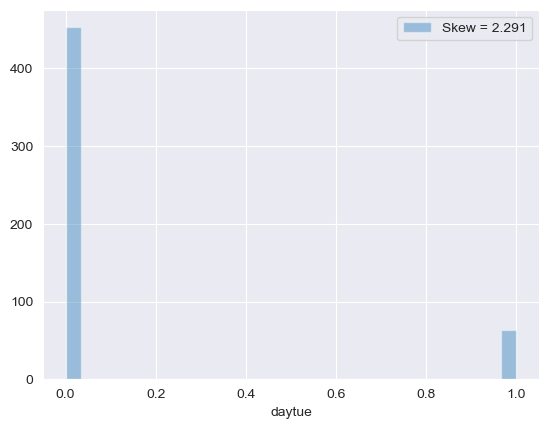

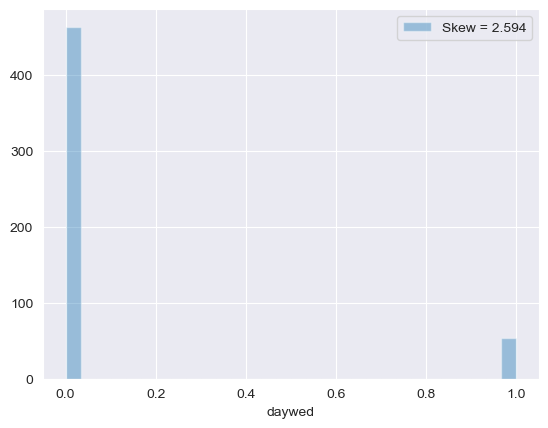

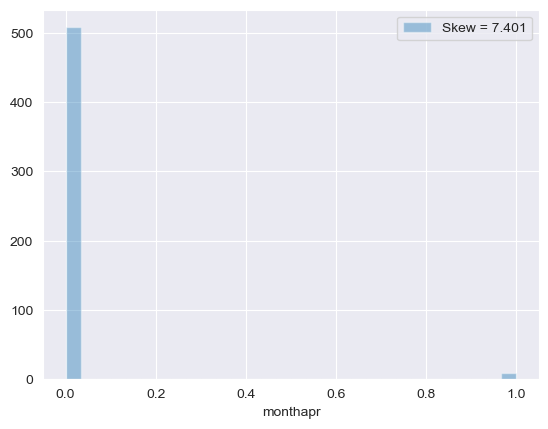

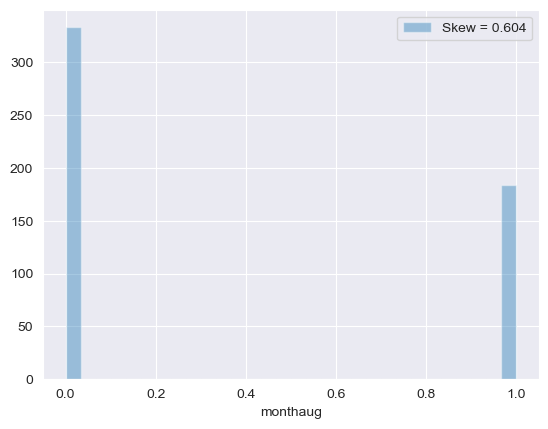

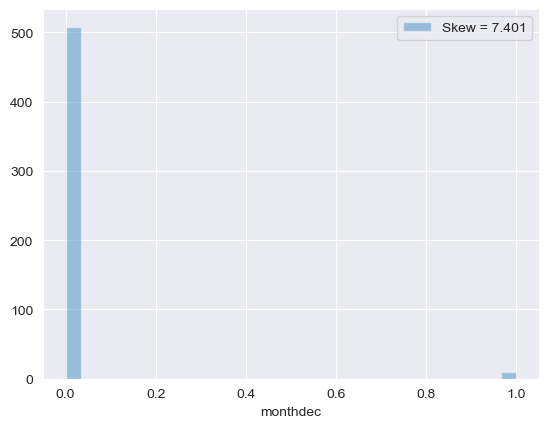

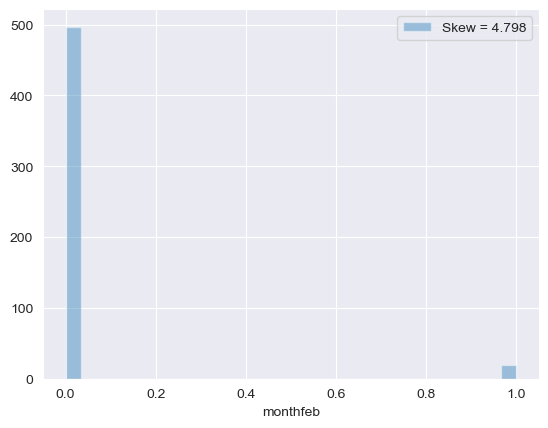

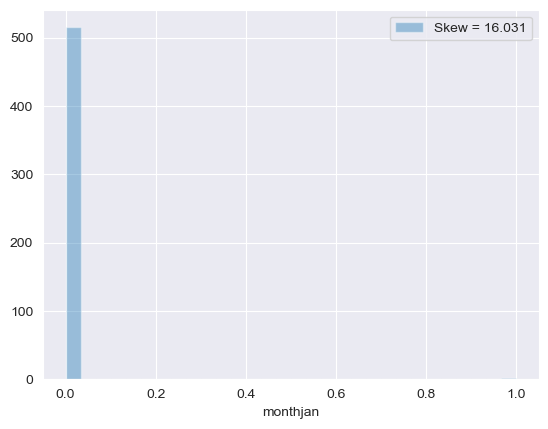

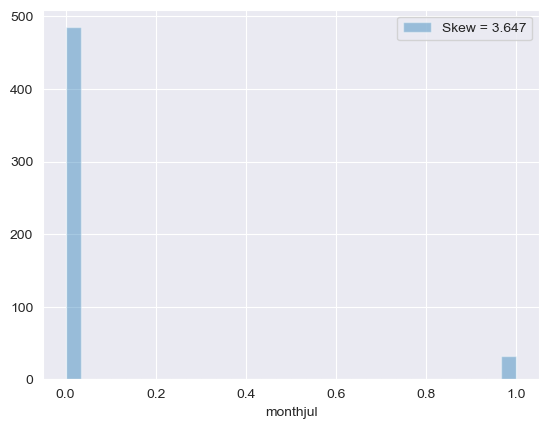

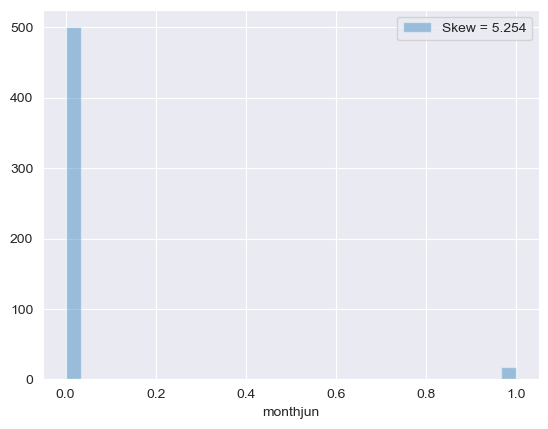

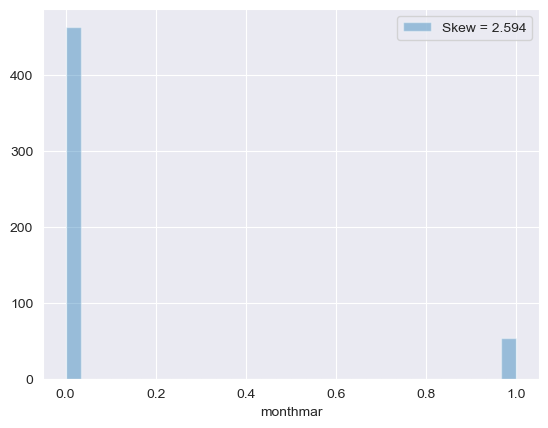

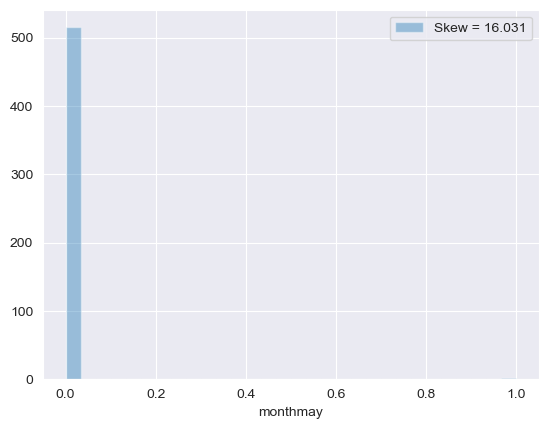

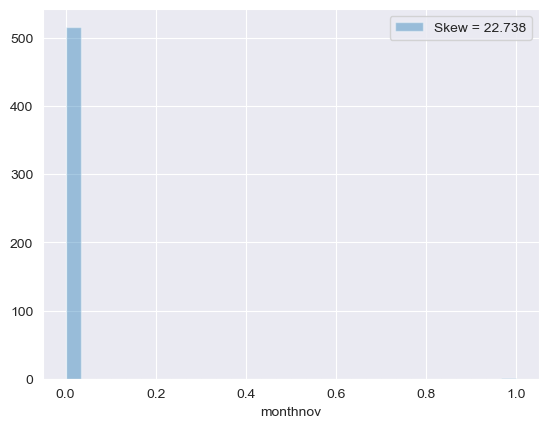

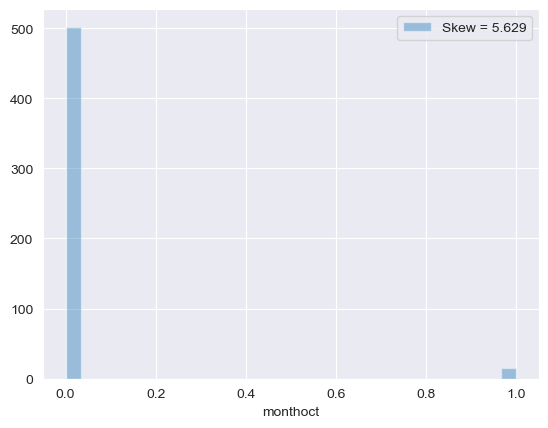

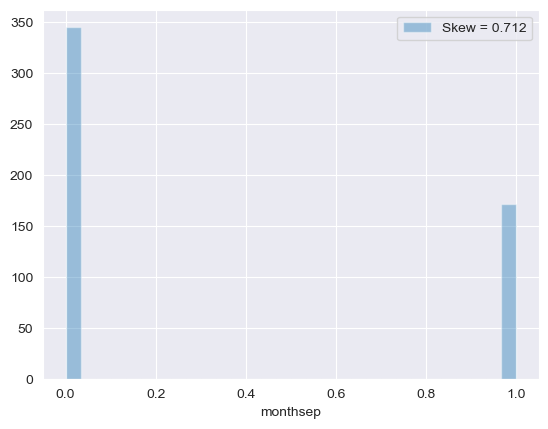

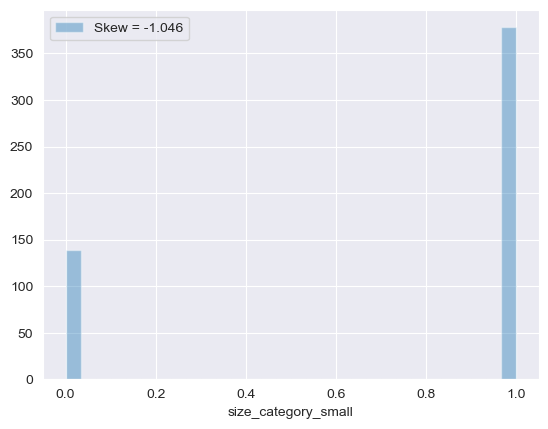

In [94]:
numerical_features=[feature for feature in data.columns if data[feature].dtypes != 'O']
for feat in numerical_features:
    skew = data[feat].skew()
    sns.distplot(data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [95]:
x = data.drop('size_category_small', axis=1)
y = data[["size_category_small"]]

In [96]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [97]:
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(x, y)

In [98]:
scores = fit.scores_

features = fit.transform(x)

In [99]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
8,0.564939,area
9,0.053336,dayfri
14,0.045431,daytue
26,0.044108,monthoct
19,0.041355,monthfeb
10,0.040807,daymon
22,0.037909,monthjun
5,0.027563,RH
4,0.027527,temp
25,0.024623,monthnov


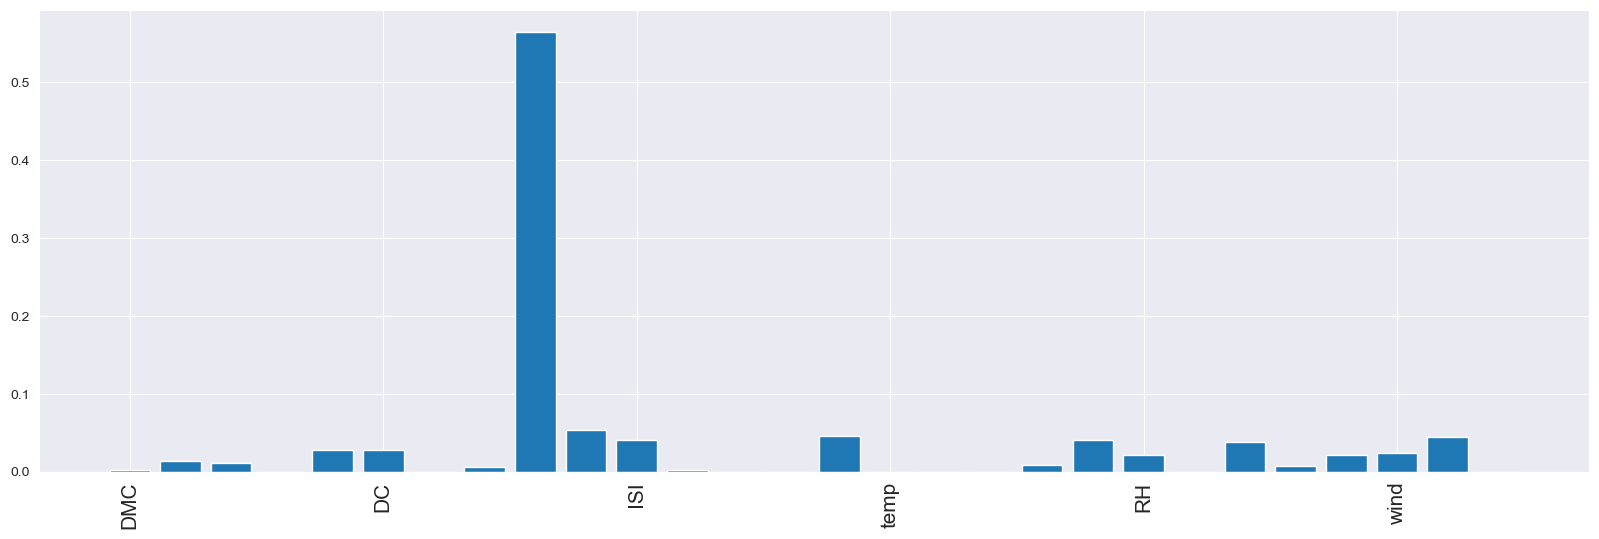

In [105]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

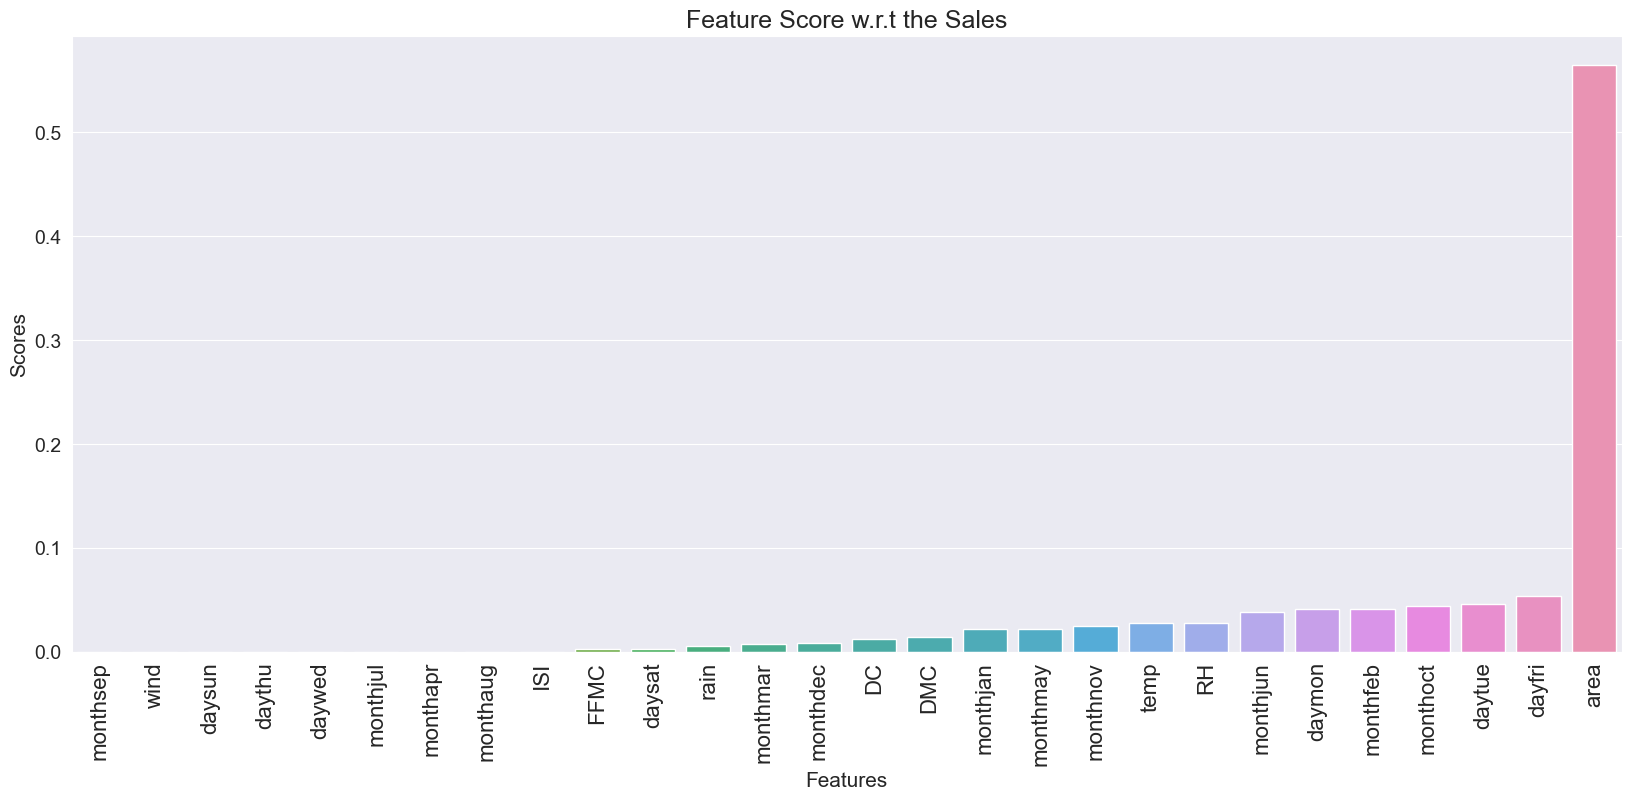

In [106]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score", 
            data=score_df, 
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [107]:
score_df.sort_values('Score',ascending=False)

,Score,Feature
8,0.564939,area
9,0.053336,dayfri
14,0.045431,daytue
26,0.044108,monthoct
19,0.041355,monthfeb
10,0.040807,daymon
22,0.037909,monthjun
5,0.027563,RH
4,0.027527,temp
25,0.024623,monthnov


In [117]:
model_data = data[['area',
'dayfri',
'daytue',
'monthoct',
'monthfeb',
'daymon',
'monthjun',
'RH',
'temp',
'monthnov',
'monthmay',
'monthjan',
'DMC',
'DC',
'monthdec',
'monthmar',
'rain',
'daysat',
'FFMC','size_category_small']]
model_data.head()

,area,dayfri,daytue,monthoct,monthfeb,daymon,monthjun,RH,temp,monthnov,monthmay,monthjan,DMC,DC,monthdec,monthmar,rain,daysat,FFMC,size_category_small
0,0.0,1,0,0,0,0,0,51,8.2,0,0,0,26.2,94.3,0,1,0.0,0,86.2,1
1,0.0,0,1,1,0,0,0,33,18.0,0,0,0,35.4,669.1,0,0,0.0,0,90.6,1
2,0.0,0,0,1,0,0,0,33,14.6,0,0,0,43.7,686.9,0,0,0.0,1,90.6,1
3,0.0,1,0,0,0,0,0,97,8.3,0,0,0,33.3,77.5,0,1,0.2,0,91.7,1
4,0.0,0,0,0,0,0,0,99,11.4,0,0,0,51.3,102.2,0,1,0.0,0,89.3,1


In [119]:
continuous_feature=[feature for feature in model_data.columns if model_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 20


In [120]:
df_standard_scaled = model_data.copy()
features = df_standard_scaled[continuous_feature]

In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,area,dayfri,daytue,monthoct,monthfeb,daymon,monthjun,RH,temp,monthnov,monthmay,monthjan,DMC,DC,monthdec,monthmar,rain,daysat,FFMC,size_category_small
0,-0.20202,2.254407,-0.375873,-0.172860,-0.200603,-0.408709,-0.184391,0.411724,-1.842640,-0.044023,-0.062318,-0.062318,-1.323326,-1.830477,-0.133103,2.928152,-0.073268,-0.440449,-0.805959,0.606403
1,-0.20202,-0.443576,2.660475,5.785038,-0.200603,-0.408709,-0.184391,-0.692456,-0.153278,-0.044023,-0.062318,-0.062318,-1.179541,0.488891,-0.133103,-0.341512,-0.073268,-0.440449,-0.008102,0.606403
2,-0.20202,-0.443576,-0.375873,5.785038,-0.200603,-0.408709,-0.184391,-0.692456,-0.739383,-0.044023,-0.062318,-0.062318,-1.049822,0.560715,-0.133103,-0.341512,-0.073268,2.270410,-0.008102,0.606403
3,-0.20202,2.254407,-0.375873,-0.172860,-0.200603,-0.408709,-0.184391,3.233519,-1.825402,-0.044023,-0.062318,-0.062318,-1.212361,-1.898266,-0.133103,2.928152,0.603155,-0.440449,0.191362,0.606403
4,-0.20202,-0.443576,-0.375873,-0.172860,-0.200603,-0.408709,-0.184391,3.356206,-1.291012,-0.044023,-0.062318,-0.062318,-0.931043,-1.798600,-0.133103,2.928152,-0.073268,-0.440449,-0.243833,0.606403


In [122]:
x = df_standard_scaled.drop('size_category_small',axis=1)
y = df_standard_scaled[['size_category_small']]

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

In [124]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [125]:
tuner = RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,  executions_per_trial=3,directory='project',project_name='Gas Turbine')


Reloading Tuner from project\Gas Turbine\tuner0.json


In [126]:
tuner.search_space_summary()


Search space summary
Default search space size: 20
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_6

In [127]:
tuner.search(x_train, y_train,epochs=10,validation_data=(x_test, y_test))


In [128]:
tuner.results_summary()


Results summary
Results in project\Gas Turbine
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 4 summary
Hyperparameters:
num_layers: 18
units_0: 96
units_1: 64
learning_rate: 0.0001
units_2: 32
units_3: 96
units_4: 32
units_5: 32
units_6: 32
units_7: 64
units_8: 32
units_9: 64
units_10: 96
units_11: 96
units_12: 96
units_13: 64
units_14: 32
units_15: 96
units_16: 32
units_17: 32
Score: 0.028938882052898407

Trial 0 summary
Hyperparameters:
num_layers: 14
units_0: 96
units_1: 96
learning_rate: 0.01
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
Score: 0.02916215981046359

Trial 1 summary
Hyperparameters:
num_layers: 7
units_0: 32
units_1: 64
learning_rate: 0.001
units_2: 96
units_3: 64
units_4: 96
units_5: 64
units_6: 32
units_7: 96
units_8: 64
units_9: 32
units_10: 32
units_11: 96
units_12: 32
units_13: 32
Score: 0.030539477864901226

Trial 2 su

In [129]:
model_data

,area,dayfri,daytue,monthoct,monthfeb,daymon,monthjun,RH,temp,monthnov,monthmay,monthjan,DMC,DC,monthdec,monthmar,rain,daysat,FFMC,size_category_small
0,0.00,1,0,0,0,0,0,51,8.2,0,0,0,26.2,94.3,0,1,0.0,0,86.2,1
1,0.00,0,1,1,0,0,0,33,18.0,0,0,0,35.4,669.1,0,0,0.0,0,90.6,1
2,0.00,0,0,1,0,0,0,33,14.6,0,0,0,43.7,686.9,0,0,0.0,1,90.6,1
3,0.00,1,0,0,0,0,0,97,8.3,0,0,0,33.3,77.5,0,1,0.2,0,91.7,1
4,0.00,0,0,0,0,0,0,99,11.4,0,0,0,51.3,102.2,0,1,0.0,0,89.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,6.44,0,0,0,0,0,0,32,27.8,0,0,0,56.7,665.6,0,0,0.0,0,81.6,0
513,54.29,0,0,0,0,0,0,71,21.9,0,0,0,56.7,665.6,0,0,0.0,0,81.6,0
514,11.16,0,0,0,0,0,0,70,21.2,0,0,0,56.7,665.6,0,0,0.0,0,81.6,0
515,0.00,0,0,0,0,0,0,42,25.6,0,0,0,146.0,614.7,0,0,0.0,1,94.4,1


In [130]:
x = model_data.drop('size_category_small', axis=1)
y = model_data[["size_category_small"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) # scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test) # scaling test data -- predictor

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(413, 19)
(104, 19)
(413, 1)
(104, 1)


In [131]:
model = Sequential()
model.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 7)) # input layer
model.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( units = 1  , kernel_initializer = 'normal' )) # o/p layer

model.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
model.fit(x_train_scaled, y_train , batch_size=50, validation_split=0.3, epochs=100,  verbose=1)

Epoch 1/100


ValueError: in user code:

    File "C:\Users\DELL\anaconda3\ds.py.ad\lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\DELL\anaconda3\ds.py.ad\lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\DELL\anaconda3\ds.py.ad\lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\DELL\anaconda3\ds.py.ad\lib\site-packages\keras\src\engine\training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\DELL\anaconda3\ds.py.ad\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\DELL\anaconda3\ds.py.ad\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 7), found shape=(None, 19)
